In [1]:
import matplotlib.pyplot as plt
import nrrd
import requests

from fcsv_parser import read_fscv


In [2]:
"""
Download and save Slicer3D test data to local folder.
"""

img_data = requests.get("http://www.slicer.org/w/img_auth.php/4/43/MR-head.nrrd").content

with open("MRI.nrrd", "wb") as fp:
    fp.write(img_data)

img, hdr = nrrd.read("MRI.nrrd")


In [3]:
"""
Load fiducials data
"""

fiducials = read_fscv("corpus_callosum.fcsv")
fiducials.fiducial_dict

{'F-1': (2.145, -60.0, -45.0),
 'F-2': (2.145, -60.0, 12.0),
 'F-3': (2.145, 40.0, 12.0),
 'F-4': (2.145, 40.0, -45.0)}

In [4]:
x_origin = hdr["space origin"][1]
y_origin = hdr["space origin"][2]
dims = hdr["sizes"]

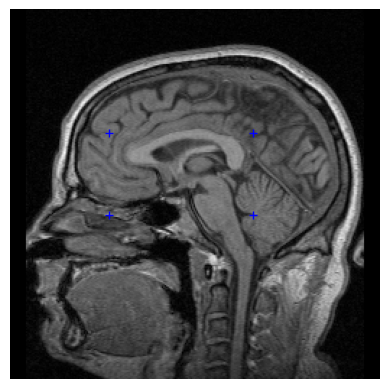

In [5]:
plt.imshow(img[:, :, 65].T, cmap="gray")

for coord in fiducials.fiducial_dict.values():
    y_value = (dims[1] + coord[1]) - 128
    x_value = (dims[2] + coord[2])
    plt.plot(y_value, x_value, "b+")

plt.axis("off")
plt.show()